# Modeling assets with ARIMA model

In [3]:
install.packages("quantmod")
install.packages("forecast")


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmp1Wh3v2/downloaded_packages

The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmp1Wh3v2/downloaded_packages


In [4]:
require(quantmod)
require(forecast)

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: forecast



In [26]:
# We download IBM stock prices from yahoo finance
getSymbols("AMZN", src="yahoo")

[1] "AMZN"

In [27]:
# log daily returns
returns <- diff(log(Ad(IBM)))
head(returns)

           IBM.Adjusted
2007-01-03           NA
2007-01-04  0.010635794
2007-01-05 -0.009094487
2007-01-08  0.015077612
2007-01-09  0.011760853
2007-01-10 -0.011861575

In [28]:
# first value is NA so get rid of it
returns <- returns[-1]
head(returns)

           IBM.Adjusted
2007-01-04  0.010635794
2007-01-05 -0.009094487
2007-01-08  0.015077612
2007-01-09  0.011760853
2007-01-10 -0.011861575
2007-01-11 -0.002430172

In [29]:
# let's find the optimal p,d,q values with AIC
result.aic <- Inf
result.order <- c(0,0,0)

In [30]:
for (p in 1:4) for (d in 0:1) for (q in 1:4){
    
    actual.aic <- AIC(arima(returns, order=c(p,d,q), optim.control=list(maxit = 1000)))
    
    if( actual.aic < result.aic ){
        result.aic <- actual.aic
        result.order <- c(p,d,q)
        result.arima <- arima(returns, order=solution.order, optim.control=list(maxit = 1000))
    }
    
}

In [32]:
# order of ARIMA model
result.order

[1] 4 0 4

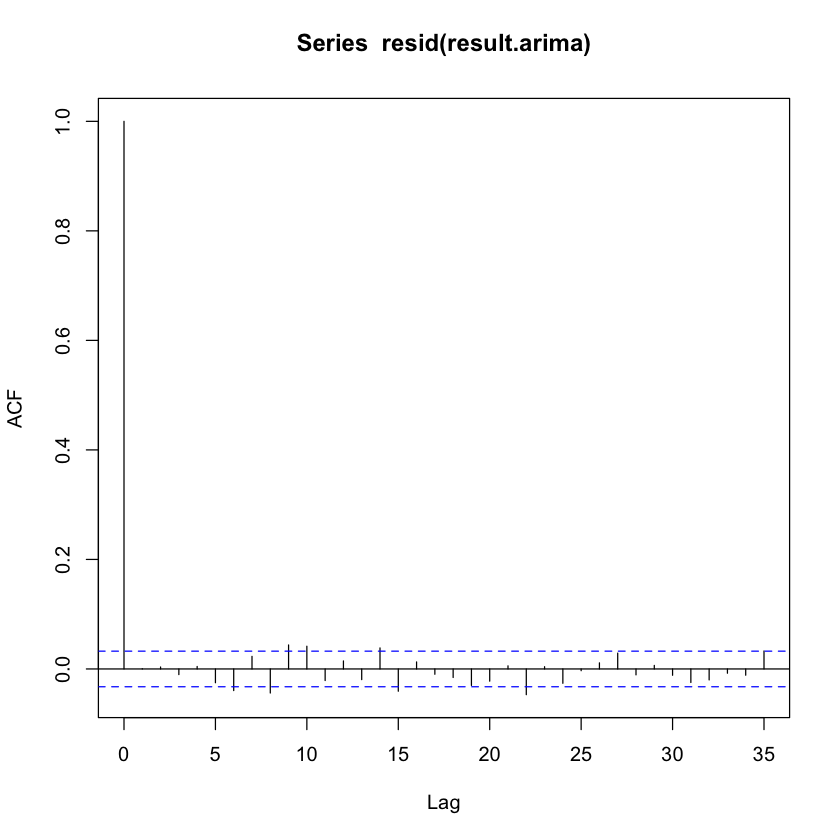

In [33]:
# Check autocorrelation
acf(resid(result.arima), na.action=na.omit)

In [37]:
# Check Ljung-Box p-value
Box.test(resid(result.arima), lag=25, type="Ljung-Box")


	Box-Ljung test

data:  resid(result.arima)
X-squared = 63.613, df = 25, p-value = 3.263e-05


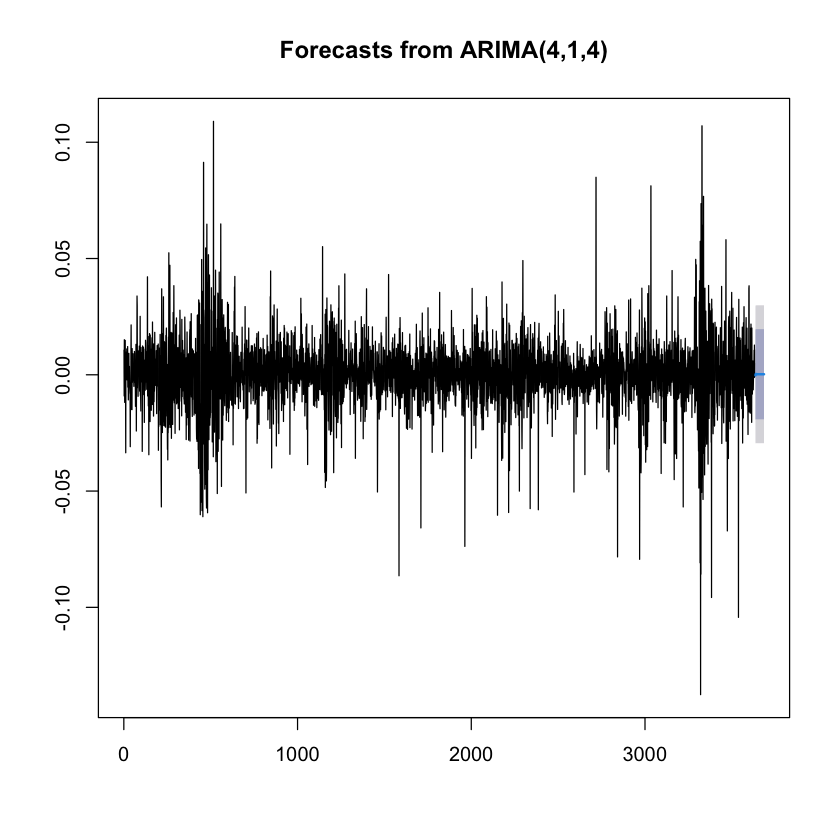

In [41]:
# Let's forecast the log daily returns in the coming 50 days!!!
plot(forecast(result.arima, h=50))